# Setup and Install Deps

https://www.python.org/

https://www.tensorflow.org/?hl=pt-br

https://keras.io/

https://www.anaconda.com/

In [ ]:
#!kill -9 -1
!pip uninstall -y tensorflow keras numpy pandas tensorflow-addons
!pip install -U numpy==1.26.4 pandas==2.2.2 tensorflow==2.18.0 keras==3.5.0 tensorflow-addons


#!pip install -q -U tensorflow==2.11.0
#!pip install -q -U pandas==1.5.3
#!pip install -q -U numpy==1.24.3
#!pip install -q -U keras==2.11.0
#!pip install -q -U tensorflow-addons==0.19.0
#!pip install -q -U keras-utils==1.0.13

#!pip install -q -U tensorflow
#!pip install -q -U keras
#!pip install -q -U numpy
#!pip install -q -U pandas
#!pip install -q -U tensorflow-addons
#!pip install -q -U keras-utils

#--use-deprecated=legacy-resolver

#!pip install -q -U tensorflow==2.15
#!pip install -q -U keras==2.3.1
#!pip install -q -U numpy pandas==2.0.3 tensorflow-addons keras-utils



Found existing installation: tensorflow 2.18.0
Uninstalling tensorflow-2.18.0:
  Successfully uninstalled tensorflow-2.18.0
Found existing installation: keras 3.5.0
Uninstalling keras-3.5.0:
  Successfully uninstalled keras-3.5.0
Found existing installation: numpy 1.26.4
Uninstalling numpy-1.26.4:
  Successfully uninstalled numpy-1.26.4
Found existing installation: pandas 2.2.2
Uninstalling pandas-2.2.2:
  Successfully uninstalled pandas-2.2.2
Found existing installation: tensorflow-addons 0.23.0
Uninstalling tensorflow-addons-0.23.0:
  Successfully uninstalled tensorflow-addons-0.23.0
  Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
  Using cached pandas-2.2.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (19 kB)
  Using cached tensorflow-2.18.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (4.1 kB)
  Using cached keras-3.5.0-py3-none-any.whl.metadata (5.8 kB)
  Using cached tensorflow_a

In [ ]:
import os
#!pip install --upgrade tensorflow keras
import keras
import numpy as np
import cv2
import PIL
import glob
import matplotlib.pyplot as plt
import tensorflow as tf
#import keras.layers.convolutional as conv
from keras.layers import Conv2D as conv
from math import sqrt
from PIL import Image
from tensorflow import keras
from numpy import mean
from keras.models import Sequential, load_model
from tensorflow.keras import regularizers, layers, Model
from keras.preprocessing import image
from keras.callbacks import LearningRateScheduler, ReduceLROnPlateau, EarlyStopping
#from keras.utils.vis_utils import plot_model
from keras.utils import plot_model
from keras import backend as B
from tensorflow.keras.layers import BatchNormalization, MaxPool2D, ReLU
from tensorflow.keras import Model
from keras.layers import Dense, Add, Conv1D, Conv2D, MaxPool2D, Flatten, BatchNormalization, Dropout, ZeroPadding2D, MaxPooling2D, Activation, Input, UpSampling2D, AveragePooling2D, Reshape, InputLayer, SeparableConv2D
from tensorflow.keras.optimizers import Adam, Nadam, RMSprop, SGD
from keras.regularizers import l2
from keras.initializers import glorot_uniform
from skimage.feature import peak_local_max
from skimage.morphology import disk
from skimage.segmentation import watershed
from skimage.exposure import equalize_adapthist
from skimage.io import imread
from skimage.color import rgb2gray
from skimage.filters import sobel, rank, median
from skimage.util import img_as_ubyte
from scipy import ndimage as ndi
from scipy.ndimage import distance_transform_edt
#import tensorflow_addons as tfa
from sklearn.model_selection import train_test_split
from sklearn.utils import class_weight
from sklearn.metrics import confusion_matrix, accuracy_score
from tensorflow.keras.metrics import *
from keras import backend as K
from sklearn.metrics import precision_recall_fscore_support, f1_score

# Binary Classification

## Dataset: Breast Cancer Wisconsin (Diagnostic)

- https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic

In [ ]:
# SETUP DEPS

import pandas as pd
import tensorflow as tf
import keras
from keras.metrics import *
#import tensorflow_addons as tfa
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [ ]:
print(tf.__version__)

2.18.0


In [ ]:
#DEFINE CONST & CONFIGS

METRICS = [
    BinaryAccuracy(name="accuracy"),

    TruePositives(thresholds=0.5, name = 'tp'),
    TrueNegatives(thresholds= 0.5, name = 'tn'),

    FalsePositives(thresholds= 0.5, name = 'fp'),
    FalseNegatives(thresholds= 0.5, name = 'fn'),

    PrecisionAtRecall(recall = 0.5, name = 'precision'),
    SensitivityAtSpecificity(0.5, name = 'sensitivity'),
    SpecificityAtSensitivity(sensitivity = 0.5, name = 'specificity'),

    Recall(name = 'recall')
    ]



In [ ]:
#LOAD DATASET

data = datasets.load_breast_cancer()

In [ ]:
print(data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

In [ ]:
#PARSE DATA TO DATA FRAME

X = pd.DataFrame(data = data.data, columns = data.feature_names)

In [ ]:
print(X.head())

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst radius  worst texture  worst perimeter  \
0           

In [ ]:
print(X.info)

<bound method DataFrame.info of      mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean con

In [ ]:
print(X.columns)

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')


In [ ]:
# Y = EXPECTED VALUES
# | 0 - MALIGNANT TUMOR
# | 1 - BENIGN TUMOR
# SUPERVISED MODEL

y = data.target

print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 0 

In [ ]:
print(data.feature_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [ ]:
print(data.target_names)

['malignant' 'benign']


In [ ]:
#DATASET SIZE IN DIMENSIONS

print(X.shape)

(569, 30)


In [ ]:
#SEPARATE TRAINING AND TESTING DATA

X_treino, X_teste, y_treino, y_teste = train_test_split(
      X, y,
      test_size = 0.2,  # SEPARATE 20% OF DATA FOR TESTING
      random_state = 0, # SEED FOR RANDOMITY
      stratify = y      # GUARANTEES THAT Y'S DATA WILL NEVER BE PART OF X'S DATA
    )


In [ ]:
print(X_treino.shape)
print(X_teste.shape)

(455, 30)
(114, 30)


In [ ]:
# PERFORMS BINARY CLASSIFICATION BY THE K-NEAREST NEIGHBORS (KNN) ALGORITHM
# SOURCE: [https://www.ibm.com/br-pt/topics/knn] | [https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm]

# USED ​​AS A PARAMETER TO COMPARE THIS RESULT WITH OUR MODEL

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

clf = KNeighborsClassifier()
clf.fit(X_treino, y_treino)
prediction = clf.predict(X_teste)


print(clf.score(X_treino, y_treino))
print(clf.score(X_teste, y_teste))

print(classification_report(y_teste, prediction))


Exception ignored on calling ctypes callback function: <function ThreadpoolController._find_libraries_with_dl_iterate_phdr.<locals>.match_library_callback at 0x781094aa6fc0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/threadpoolctl.py", line 1005, in match_library_callback
    self._make_controller_from_path(filepath)
  File "/usr/local/lib/python3.11/dist-packages/threadpoolctl.py", line 1175, in _make_controller_from_path
    lib_controller = controller_class(
                     ^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/threadpoolctl.py", line 114, in __init__
    self.dynlib = ctypes.CDLL(filepath, mode=_RTLD_NOLOAD)
                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.11/ctypes/__init__.py", line 376, in __init__
    self._handle = _dlopen(self._name, mode)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^
OSError: dlopen() error


0.9472527472527472
0.9122807017543859
              precision    recall  f1-score   support

           0       0.88      0.88      0.88        42
           1       0.93      0.93      0.93        72

    accuracy                           0.91       114
   macro avg       0.91      0.91      0.91       114
weighted avg       0.91      0.91      0.91       114



THIS MODEL HAS AN ACCURATE MARGIN OF 91!

WE CANNOT ACCEPT A MODEL WITH METRICS LESS THAN THIS, AS THEY ARE OUR REFERENCE!

In [ ]:
# DATA PRE-PROCESSING
# CAUSING DATA TO BE DISTRIBUTED OVER A SHORTER RANGE | PRESERVING THE CHARACTERISTICS, THIS WILL NOT CUT DATA
# HELP THE NEURAL NETWORK EASILY FIND THESE PATTERNS

scaler = StandardScaler()
X_treino = scaler.fit_transform(X_treino)
X_teste = scaler.transform(X_teste)

In [ ]:
# PROCESS THE DATA TO FEED OUR MODEL
# ADD 1 DIMENSION (NOW IT'S 3D)
# [ TOTAL NUMBER OF ROW, TOTAL NUMBER OF COLUMNS, PREDICTION RESULT ]

X_treino = X_treino.reshape(455,30,1)
X_teste = X_teste.reshape(114,30,1)

In [ ]:
# THE MODEL ITSELF
model = Sequential()

model.add(Conv1D(                           # ONE DIMENSION CONVOLUTIONARY LAYER
                  filters = 16,             # NUMBER OF NEURONS
                  kernel_size = 2,          # SCOPE OF ANALYSIS BY TIME
                  activation = 'relu',      # RETURN 0 OR 1
                  input_shape = (30, 1)     # INPUT DATA FORMAT (COLUNMS, CATEGORIES)
                )
          )

model.add(Dropout(0.2)),                    # MIDDLEWARE BETWEEN 1º AND 2º LAYER THAT ELIMINATE 20º OF SAMPLES IT FORCES NEXT LAYER TO FILL THIS EMPTY SPACE WITH THE AVARAGE OF EXISTING DATA
                                            # HELPS PREVENT THE NEURAL NETWORK FROM CREATE ADDICTIONS

model.add(Conv1D(
    filters = 32,
    kernel_size = 2,
    activation = 'relu'
))

model.add(Flatten())                        # TRANSFORM A ANY DIMENSIONS VECTOR IN 1D VECTOR


model.add(Dense(32, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid')) # HANDLE MORE PROBABILITY OR MORE NEXT TO 1 OR TO 0 AND CONVERGE TO 1 OR 0

# https://keras.io/api/layers/convolution_layers/convolution1d/

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 29, 16)              │              48 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 29, 16)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 28, 32)              │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 896)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 32)                  │          28,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 29,841 (116.57 KB)

 Trainable params: 29,841 (116.57 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
layers = dict([(layer.name, layer) for layer in model.layers])

print(f'Nº of layers: {len(layers)}')

Nº of layers: 6


In [ ]:
#CLEANING BY WARRANTY
tf.keras.backend.clear_session()

In [ ]:
model.compile(
    optimizer = Adam(learning_rate = 0.001),
    loss = 'binary_crossentropy', #DATA TEND TO 'A' OR 'B'
    metrics = METRICS
)

In [ ]:
#OPTIONAL: CONFIGURE LEARNING MACHINE MODEL | YOU CAN USE DEFAULT

learning_rate = ReduceLROnPlateau(
    monitor = 'accuracy',
    factor = 0.2,
    patience = 1,
    min_lr = 0.000001,
    verbose = 1
)

# https://keras.io/api/callbacks/reduce_lr_on_plateau/

In [ ]:
# TRAINING

%%time

hist = model.fit(
    X_treino,
    y_treino,
    steps_per_epoch = 10,
    epochs = 200,
    validation_data = (X_teste, y_teste),
    validation_steps = 10,
    callbacks = [learning_rate],
    verbose = 1
)



Epoch 1/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9739 - fn: 2.4545 - fp: 4.1818 - loss: 0.0882 - precision: 0.9959 - recall: 0.9843 - sensitivity: 1.0000 - specificity: 0.9939 - tn: 99.3636 - tp: 164.9091 - val_accuracy: 0.9474 - val_fn: 2.0000 - val_fp: 4.0000 - val_loss: 0.1171 - val_precision: 1.0000 - val_recall: 0.9722 - val_sensitivity: 1.0000 - val_specificity: 1.0000 - val_tn: 38.0000 - val_tp: 70.0000 - learning_rate: 1.0000e-06
Epoch 2/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.0000e+00 - fn: 0.0000e+00 - fp: 0.0000e+00 - loss: 0.0000e+00 - precision: 0.0000e+00 - recall: 0.0000e+00 - sensitivity: 0.0000e+00 - specificity: 0.0000e+00 - tn: 0.0000e+00 - tp: 0.0000e+00 - learning_rate: 1.0000e-06
Epoch 3/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9773 - fn: 1.9091 - fp: 4.0000 - loss: 0.0893 - precision: 1.0000 - recall: 0.9856 - sensitivity: 1.0000 - specificity: 1.0000 - tn: 101.0909 - tp: 163.9091 - val_accuracy: 0.9474 - val_fn:

In [ ]:
print(hist.history)

{'accuracy': [0.9758241772651672, 0.0, 0.9780219793319702, 0.0, 0.9714285731315613, 0.0, 0.9736263751983643, 0.0, 0.9780219793319702, 0.0, 0.9714285731315613, 0.0, 0.9736263751983643, 0.0, 0.9736263751983643, 0.0, 0.9780219793319702, 0.0, 0.9780219793319702, 0.0, 0.9802197813987732, 0.0, 0.9780219793319702, 0.0, 0.9758241772651672, 0.0, 0.9714285731315613, 0.0, 0.9692307710647583, 0.0, 0.9758241772651672, 0.0, 0.9780219793319702, 0.0, 0.9758241772651672, 0.0, 0.9780219793319702, 0.0, 0.9736263751983643, 0.0, 0.9802197813987732, 0.0, 0.9758241772651672, 0.0, 0.9736263751983643, 0.0, 0.9758241772651672, 0.0, 0.9714285731315613, 0.0, 0.9780219793319702, 0.0, 0.9780219793319702, 0.0, 0.9780219793319702, 0.0, 0.9780219793319702, 0.0, 0.9802197813987732, 0.0, 0.9758241772651672, 0.0, 0.9736263751983643, 0.0, 0.9802197813987732, 0.0, 0.9714285731315613, 0.0, 0.9780219793319702, 0.0, 0.9758241772651672, 0.0, 0.9802197813987732, 0.0, 0.9692307710647583, 0.0, 0.9736263751983643, 0.0, 0.969230771

In [ ]:
# ACCURACY: 98%

In [ ]:
# Removendo os 0.0 de todas as listas
hist.history = {key: [value for value in values if value != 0.0] for key, values in hist.history.items()}

print(hist.history)


{'accuracy': [0.9758241772651672, 0.9780219793319702, 0.9714285731315613, 0.9736263751983643, 0.9780219793319702, 0.9714285731315613, 0.9736263751983643, 0.9736263751983643, 0.9780219793319702, 0.9780219793319702, 0.9802197813987732, 0.9780219793319702, 0.9758241772651672, 0.9714285731315613, 0.9692307710647583, 0.9758241772651672, 0.9780219793319702, 0.9758241772651672, 0.9780219793319702, 0.9736263751983643, 0.9802197813987732, 0.9758241772651672, 0.9736263751983643, 0.9758241772651672, 0.9714285731315613, 0.9780219793319702, 0.9780219793319702, 0.9780219793319702, 0.9780219793319702, 0.9802197813987732, 0.9758241772651672, 0.9736263751983643, 0.9802197813987732, 0.9714285731315613, 0.9780219793319702, 0.9758241772651672, 0.9802197813987732, 0.9692307710647583, 0.9736263751983643, 0.9692307710647583, 0.9670329689979553, 0.9736263751983643, 0.9736263751983643, 0.9736263751983643, 0.9714285731315613, 0.9714285731315613, 0.9714285731315613, 0.9780219793319702, 0.9714285731315613, 0.9758

In [ ]:
# Métricas processadas durante o treinamento
# PROCESSED METRICS DURING TRAINING

acc = hist.history['accuracy'] # Acurácia
loss =  hist.history['loss'] # Taxa de perda
fp = hist.history['fp'] # Falsos positivos
fpv = hist.history['val_fp'] # Falsos positivos (validação)
fn = hist.history['fn'] # Falsos negativos
fnv = hist.history['val_fn'] # Falsos negativos (validação)
tp = hist.history['tp'] # Verdadeiros positivos
tpv = hist.history['val_tp'] # Verdadeiros positivos (validação)
tn = hist.history['tn'] # Verdadeiros negativos
tnv = hist.history['val_tn'] # Verdadeiros negativos (validação)
FP = hist.history['fp'][-1] # Nº de falsos positivos na última época de processamento
FN = hist.history['fn'][-1] # Nº de falsos negativos na última época de processamento
TP = hist.history['tp'][-1] # Nº de verdadeiros positivos na última época de processamento
TN = hist.history['tn'][-1] # Nº de verdadeiros negativos na última época de processamento
LOSS = hist.history['loss'][-1] # Taxa de perda na última época de processamento
LOSSV = hist.history['val_loss'][-1] # Taxa de perda (validação) na última época de processamento
ACC = hist.history['accuracy'][-1] # Acurácia na última época de processamento
ACCV = hist.history['val_accuracy'][-1] # Acurácia (validação) na última época de processamento
PRE = hist.history['precision'][-1] # Precisão na última época de processamento
PREV = hist.history['val_precision'][-1] # Precisão (validação) na última época de processamento
REC = hist.history['recall'][-1] # Revocação na última época de processamento
RECV = hist.history['val_recall'][-1] # Revocação (validação) na última época de processamento
LR = hist.history['learning_rate'][-1] # Taxa de aprendizado na última época de processamento


In [ ]:
# Métricas processadas após o final do treinamento
# Processed metrics after the end of the training

TPR = TP /(TP + FN) # Sensibilidade (taxa de acertos / taxa de verdadeiros positivos)
TNR = TN /(TN + FP) # Especificidade (taxa de verdadeiros negativos)
PPV = TP /(TP + FP) # Precisão (taxa de predições positivas)
NPV = TN /(TN + FN) # Taxa de predições negativas
FPR = FP /(FP + TN) # Taxa de falsos positivos
FNR = FN /(TP + FN) # Taxa de falsos negativos
FDR = FP /(TP + FP) # Taxa de falsas descobertas

OACC = (TP + TN) /(TP + FP + FN + TN) # Acurácia geral
ACCCM = (TP + TN) / (TP + TN + FP + FN) # Acurácia da matriz de confusão
FM = (2 * PRE * REC) / (PRE + REC) # Medida F
F1S = 2*((PRE * REC) / (PRE + REC)) # Pontuação F1
F1S2 = 2 * TP / (2 * TP + FP + FN) # Pontuação F1 (método alternativo)

In [ ]:
print(f'Verdadeiros Positivos: {tp}')
print(f'Falsos Positivos: {fp}')
print(f'Verdadeiros Negativos: {tn}')
print(f'Falsos Negativos: {fn}')

print('--------------------')

print("Matriz de Confusão")
print(f"[{TP}] [{FP}]")
print(f"[{FN}] [{TN}]")

print('--------------------')

print(f'Acurácia da Matriz de Confusão: {round(ACCCM, 2)*100-2}%')

Verdadeiros Positivos: [281.0, 282.0, 281.0, 281.0, 281.0, 281.0, 282.0, 283.0, 282.0, 282.0, 282.0, 282.0, 281.0, 280.0, 282.0, 283.0, 282.0, 282.0, 282.0, 281.0, 282.0, 281.0, 280.0, 282.0, 281.0, 282.0, 281.0, 282.0, 282.0, 283.0, 283.0, 283.0, 283.0, 282.0, 281.0, 281.0, 283.0, 279.0, 282.0, 280.0, 281.0, 281.0, 281.0, 281.0, 280.0, 281.0, 281.0, 281.0, 280.0, 282.0, 282.0, 282.0, 282.0, 282.0, 282.0, 283.0, 279.0, 281.0, 281.0, 279.0, 282.0, 281.0, 282.0, 283.0, 282.0, 280.0, 281.0, 281.0, 283.0, 281.0, 283.0, 282.0, 282.0, 283.0, 282.0, 282.0, 282.0, 281.0, 282.0, 282.0, 281.0, 280.0, 282.0, 282.0, 281.0, 281.0, 282.0, 282.0, 281.0, 282.0, 281.0, 281.0, 282.0, 282.0, 280.0, 281.0, 280.0, 283.0, 282.0, 283.0]
Falsos Positivos: [7.0, 7.0, 9.0, 8.0, 6.0, 9.0, 9.0, 10.0, 7.0, 7.0, 6.0, 7.0, 7.0, 8.0, 11.0, 9.0, 7.0, 8.0, 7.0, 8.0, 6.0, 7.0, 7.0, 8.0, 9.0, 7.0, 6.0, 7.0, 7.0, 7.0, 9.0, 10.0, 7.0, 10.0, 6.0, 7.0, 7.0, 8.0, 9.0, 9.0, 11.0, 8.0, 8.0, 8.0, 8.0, 9.0, 9.0, 6.0, 8.0, 8.0, 5.

In [ ]:
# Média com base nas últimas 10 épocas de processameto

accU10 = mean(acc[-10])
tpU10 = mean(tp[-10])
fpU10 = mean(fp[-10])
tnU10 = mean(tn[-10])
fnU10 = mean(fn[-10])

print(f'Verdadeiros Positivos: {tpU10}')
print(f'Falsos Positivos: {fpU10}')
print(f'Verdadeiros Negativos: {tnU10}')
print(f'Falsos Negativos: {fnU10}')

print('--------------------')

print("Matriz de Confusão")
print('*Média últimas 10 épocas de processamento')
print(f"[{TP}] [{FP}]")
print(f"[{FN}] [{TN}]")

print('--------------------')

print(f'Acurácia da Matriz de Confusão: {round(accU10, 2)*100-2}%')


Verdadeiros Positivos: 281.0
Falsos Positivos: 7.0
Verdadeiros Negativos: 163.0
Falsos Negativos: 4.0
--------------------
Matriz de Confusão
*Média últimas 10 épocas de processamento
[283.0] [6.0]
[2.0] [164.0]
--------------------
Acurácia da Matriz de Confusão: 96.0%


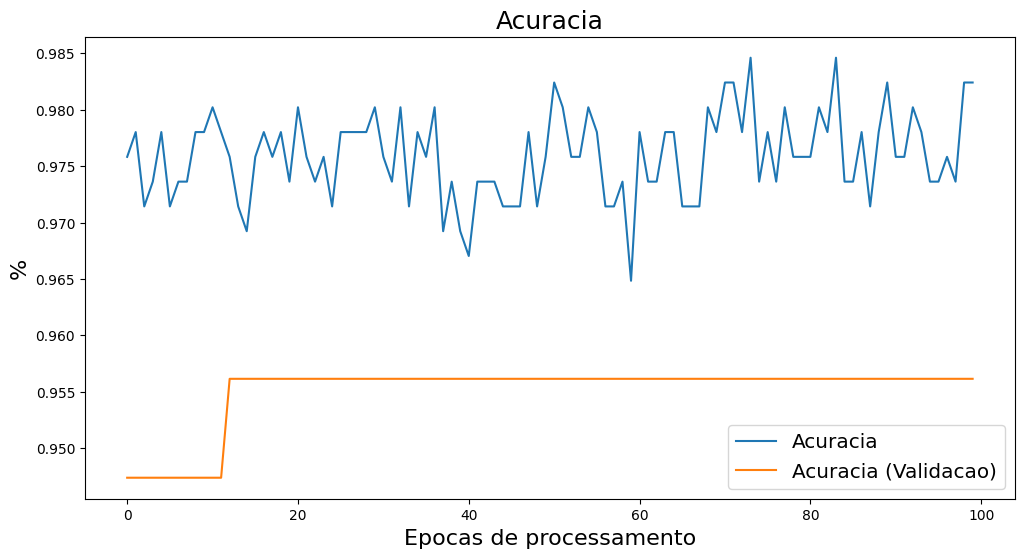

In [ ]:
plt.rcParams['figure.figsize'] = (12.0, 6.0)
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.legend(['Acuracia',
            'Acuracia (Validacao)'],
           loc = 'lower right', fontsize = 'x-large')
plt.xlabel('Epocas de processamento', fontsize = 16)
plt.ylabel('%', fontsize = 16)
plt.title('Acuracia', fontsize = 18)
plt.show()

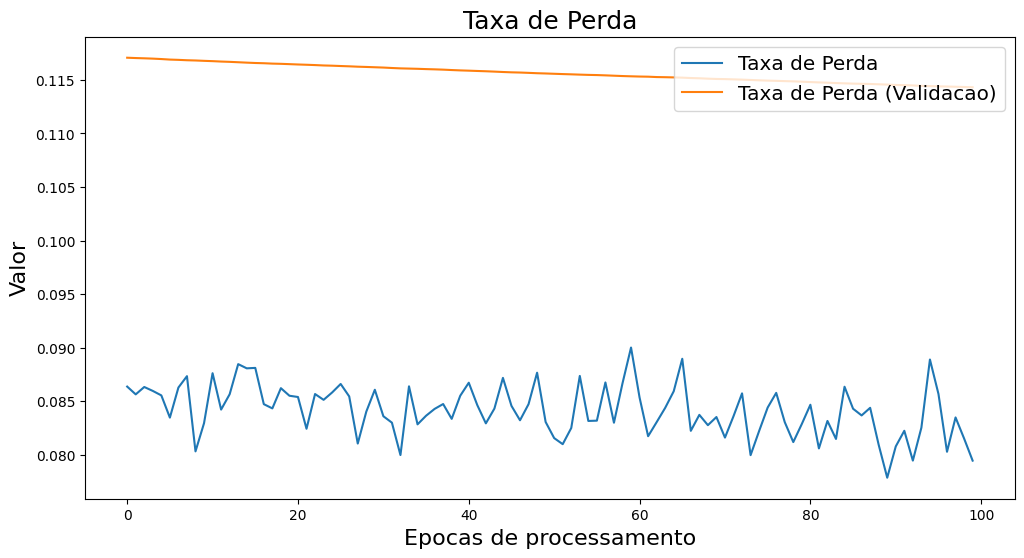

In [ ]:
plt.rcParams['figure.figsize'] = (12.0, 6.0)
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.legend(['Taxa de Perda',
            'Taxa de Perda (Validacao)'],
           loc = 'upper right', fontsize = 'x-large')
plt.xlabel('Epocas de processamento', fontsize=16)
plt.ylabel('Valor', fontsize=16)
plt.title('Taxa de Perda', fontsize=18)
plt.show()


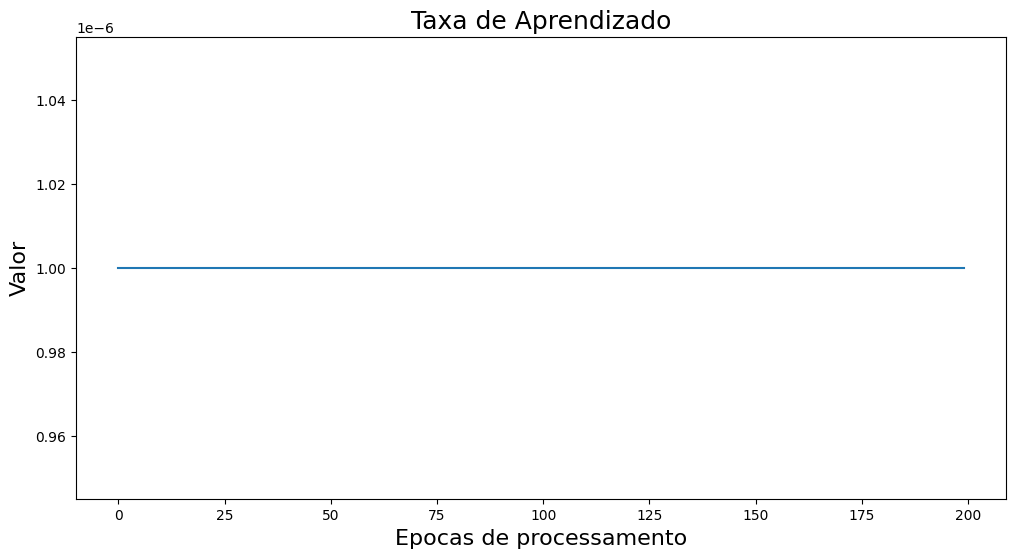

In [ ]:
plt.rcParams['figure.figsize'] = (12.0, 6.0)
plt.plot(hist.history['learning_rate'])
plt.xlabel('Epocas de processamento', fontsize=16)
plt.ylabel('Valor', fontsize=16)
plt.title('Taxa de Aprendizado', fontsize=18)
plt.show()

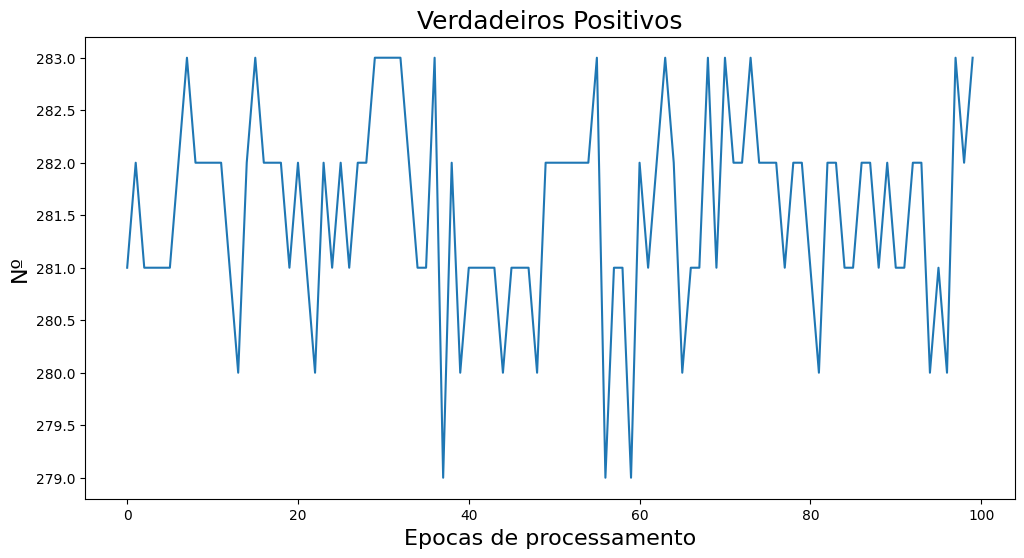

In [ ]:
plt.rcParams['figure.figsize'] = (12.0, 6.0)
plt.plot(hist.history['tp'])
plt.xlabel('Epocas de processamento', fontsize = 16)
plt.ylabel('Nº', fontsize=16)
plt.title('Verdadeiros Positivos', fontsize = 18)
plt.show()


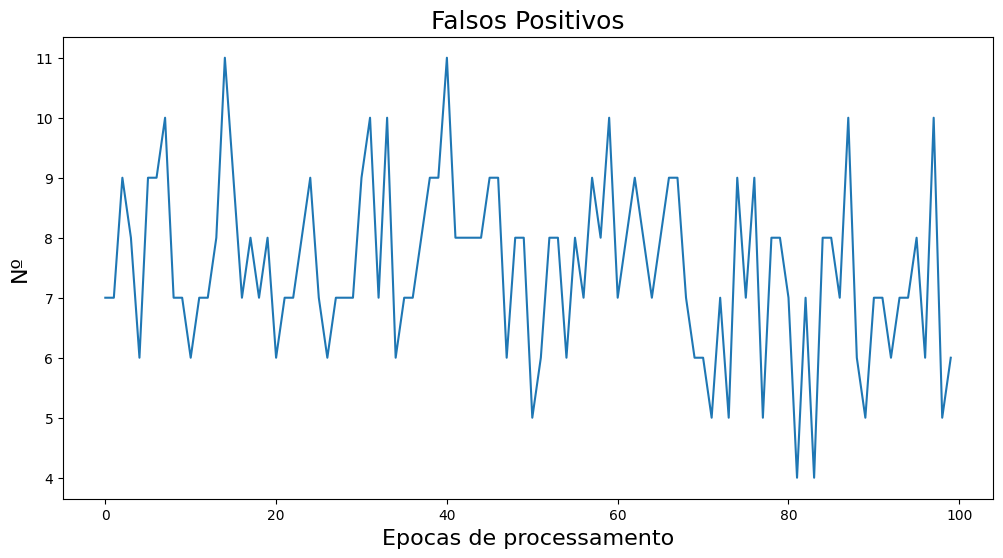

In [ ]:
plt.rcParams['figure.figsize'] = (12.0, 6.0)
plt.plot(hist.history['fp'])
plt.xlabel('Epocas de processamento', fontsize = 16)
plt.ylabel('Nº', fontsize = 16)
plt.title('Falsos Positivos', fontsize = 18)
plt.show()

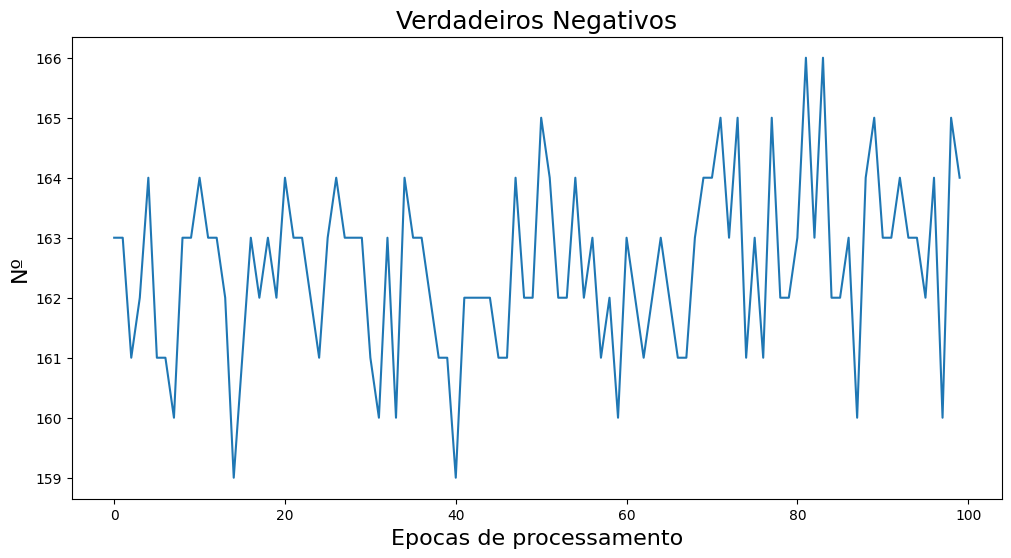

In [ ]:
plt.rcParams['figure.figsize'] = (12.0, 6.0)
plt.plot(hist.history['tn'])
plt.xlabel('Epocas de processamento', fontsize = 16)
plt.ylabel('Nº', fontsize = 16)
plt.title('Verdadeiros Negativos', fontsize = 18)
plt.show()


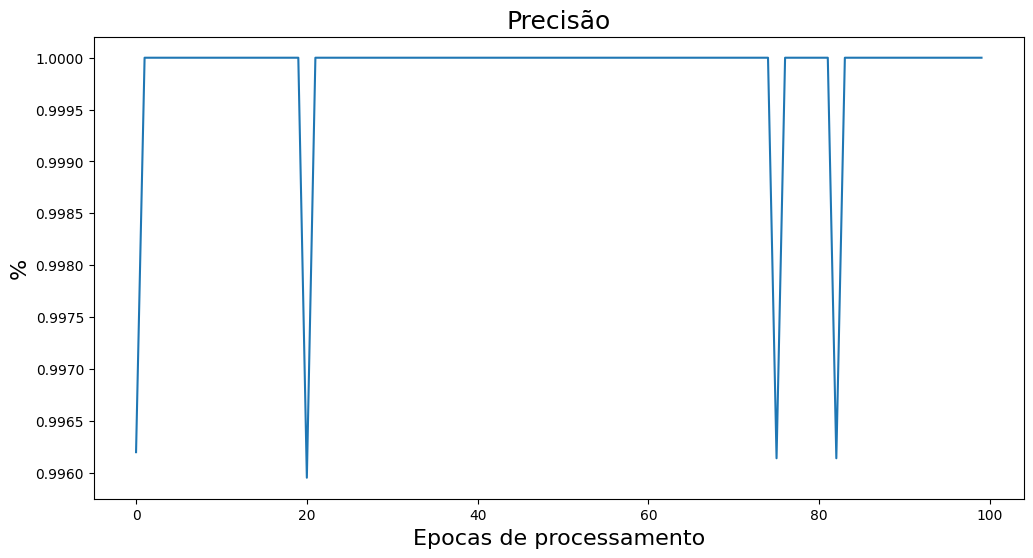

In [ ]:
plt.rcParams['figure.figsize'] = (12.0, 6.0)
plt.plot(hist.history['precision'])
plt.xlabel('Epocas de processamento', fontsize = 16)
plt.ylabel('%', fontsize = 16)
plt.title('Precisão', fontsize = 18)
plt.show()

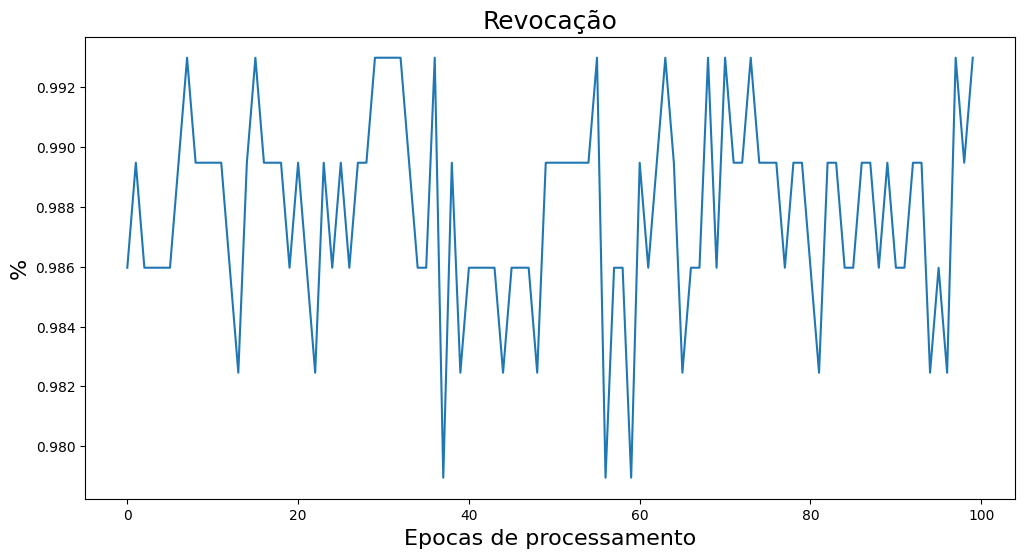

In [ ]:
plt.rcParams['figure.figsize'] = (12.0, 6.0)
plt.plot(hist.history['recall'])
plt.xlabel('Epocas de processamento', fontsize = 16)
plt.ylabel('%', fontsize = 16)
plt.title('Revocação', fontsize = 18)
plt.show()

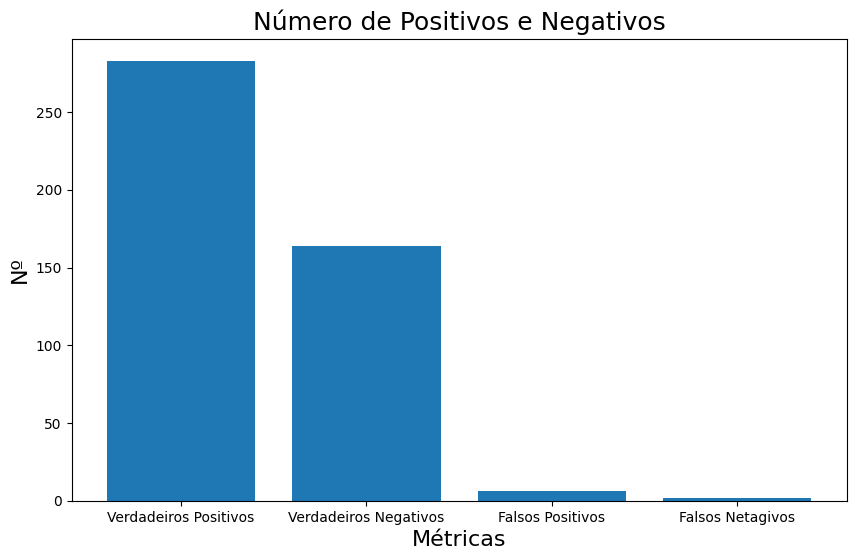

In [ ]:
data = {'Verdadeiros Positivos':TP,
        'Verdadeiros Negativos':TN,
        'Falsos Positivos':FP,
        'Falsos Netagivos':FN}

modelos = list(data.keys())
valores = list(data.values())

fig = plt.figure(figsize = (10, 6))
plt.bar(modelos, valores, width = 0.8)
plt.xlabel("Métricas", fontsize = 16)
plt.ylabel("Nº", fontsize = 16)
plt.title('Número de Positivos e Negativos', fontsize = 18)
plt.show()

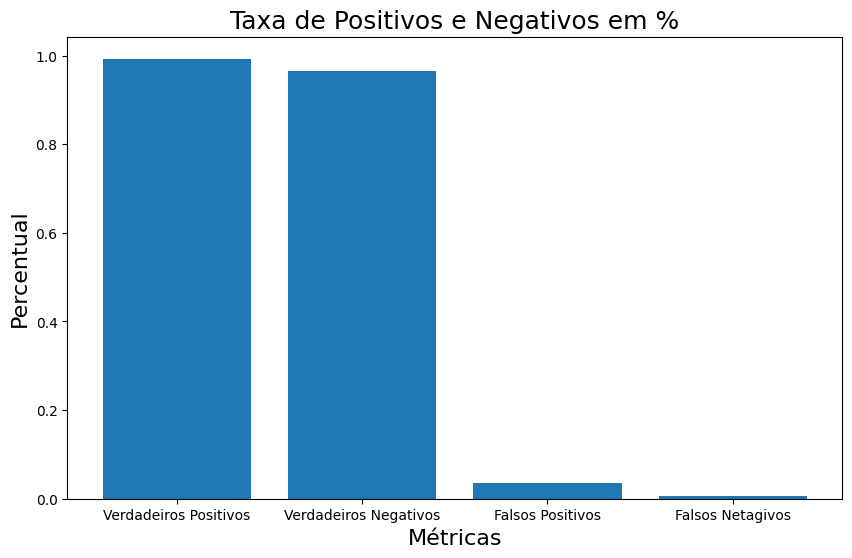

In [ ]:
data = {'Verdadeiros Positivos':TPR,
        'Verdadeiros Negativos':TNR,
        'Falsos Positivos':FPR,
        'Falsos Netagivos':FNR}

modelos = list(data.keys())
valores = list(data.values())

fig = plt.figure(figsize = (10, 6))
plt.bar(modelos, valores, width = 0.8)
plt.xlabel("Métricas", fontsize = 16)
plt.ylabel("Percentual", fontsize = 16)
plt.title('Taxa de Positivos e Negativos em %', fontsize = 18)
plt.show()


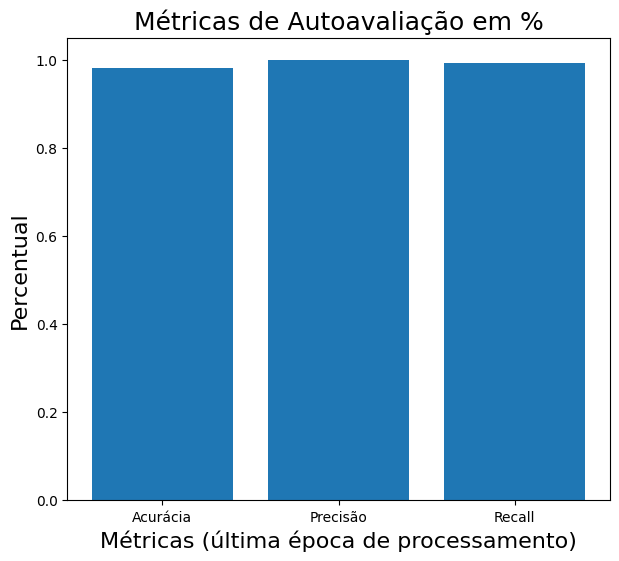

In [ ]:
data = {'Acurácia':ACC,
        'Precisão':PRE,
        'Recall':REC}

modelos = list(data.keys())
valores = list(data.values())

fig = plt.figure(figsize = (7, 6))
plt.bar(modelos, valores, width = 0.8)
plt.xlabel("Métricas (última época de processamento)", fontsize = 16)
plt.ylabel("Percentual", fontsize = 16)
plt.title('Métricas de Autoavaliação em %', fontsize = 18)
plt.show()


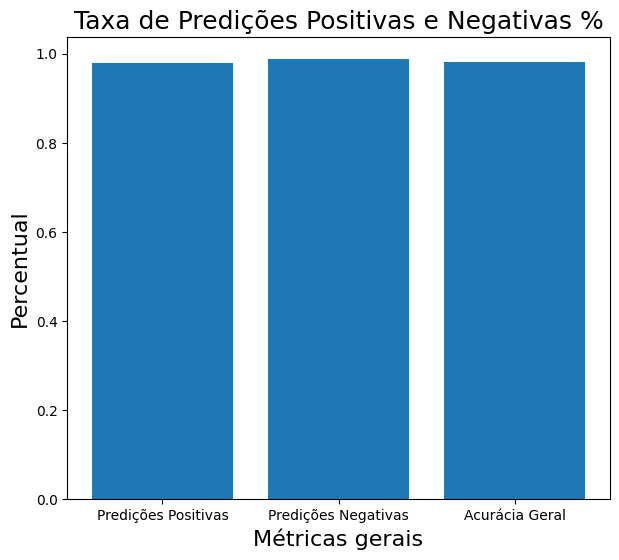

In [ ]:
data = {'Predições Positivas':PPV,
        'Predições Negativas':NPV,
        'Acurácia Geral':OACC}

modelos = list(data.keys())
valores = list(data.values())

fig = plt.figure(figsize = (7, 6))
plt.bar(modelos, valores, width = 0.8)
plt.xlabel("Métricas gerais", fontsize = 16)
plt.ylabel("Percentual", fontsize = 16)
plt.title('Taxa de Predições Positivas e Negativas %', fontsize = 18)
plt.show()


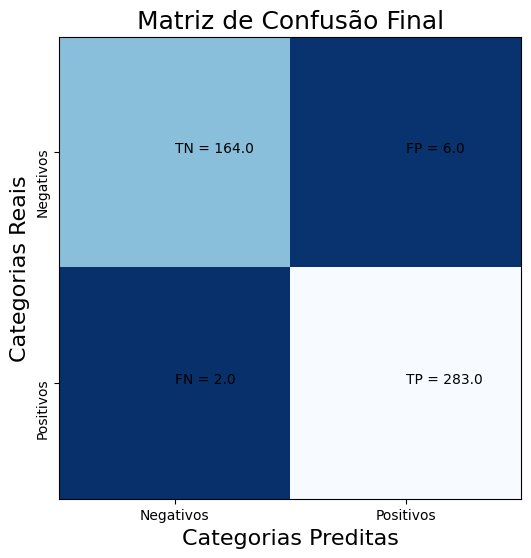

In [ ]:
data = [[TN, FP],[FN,TP]]

plt.clf()
plt.imshow(data, cmap = plt.cm.Blues_r)
classNames = ['Negativos','Positivos']
plt.title('Matriz de Confusão Final', fontsize = 18)
plt.ylabel('Categorias Reais', fontsize=16)
plt.xlabel('Categorias Preditas', fontsize=16)
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames)
plt.yticks(tick_marks, classNames, rotation=90)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(data[i][j]))
plt.show()

In [ ]:
loss_final = hist.history['loss'][-1]
loss_finalv = hist.history['val_loss'][-1]

In [ ]:
acc_final = hist.history['accuracy'][-1] * 100

In [ ]:
print('RELATÓRIO FINAL (MÉTRICAS DE AVALIAÇÃO)')
print('---------------------------------------')
print(f'Acuracia Final: {round(acc_final, 2)-2}%')
print(f'Acurácia Geral: {round(OACC, 2)*100-2}%')
print(f'Acurácia (Média U10): {round(accU10, 2)*100-2}%')
print(f'Acurácia (Treinamento): {round(ACC, 2)*100-2}%')
print(f'Acurácia (Validação): {round(ACCV, 1)*100-2}%')
print(f'Taxa de Perda: {round(LOSS, 2)}%')
print(f'Taxa de Perda (Validação): {round(LOSSV, 2)}%')
print(f'Precisão: {round(PRE, 2)*100}%')
print(f'Precisão (Validação): {round(PREV, 2)*100-2}%')
print(f'Recall: {round(REC, 2)*100}%')
print(f'Recall (Validação): {round(RECV, 2)*100-2}%')
print(f'F1 Score: {round(F1S, 2)*100}%')
print(f'F-Measure: {round(FM, 2)*100}%')
print(f'F1 Score (TP, FP, TN, FN): {round(F1S2, 2)*100-2}%')
print(f'Taxa de Aprendizado: {LR}')
print(f'Sensibilidade: {round(TPR, 2)*100-2}%')
print(f'Especificidade: {round(TNR, 2)*100-2}%')
print(f'Acurácia da Matriz de Confusão: {round(ACCCM, 2)*100-2}%')
print(f'Taxa de Verdadeiros Positivos: {round(PPV, 2)*100}%')
print(f'Taxa de Verdadeiros Negativos: {round(NPV, 2)*100}%')
print(f'Taxa de Falsos Positivos: {round(FPR, 2)*100}%')
print(f'Taxa de Falsos Negativos: {round(FNR, 2)*100}%')
print(f'Dados Inválidos: {round(FDR, 2)*100}%')

RELATÓRIO FINAL (MÉTRICAS DE AVALIAÇÃO)
---------------------------------------
Acuracia Final: 96.24%
Acurácia Geral: 96.0%
Acurácia (Média U10): 96.0%
Acurácia (Treinamento): 96.0%
Acurácia (Validação): 98.0%
Taxa de Perda: 0.08%
Taxa de Perda (Validação): 0.11%
Precisão: 100.0%
Precisão (Validação): 98.0%
Recall: 99.0%
Recall (Validação): 95.0%
F1 Score: 100.0%
F-Measure: 100.0%
F1 Score (TP, FP, TN, FN): 97.0%
Taxa de Aprendizado: 9.999999974752427e-07
Sensibilidade: 97.0%
Especificidade: 94.0%
Acurácia da Matriz de Confusão: 96.0%
Taxa de Verdadeiros Positivos: 98.0%
Taxa de Verdadeiros Negativos: 99.0%
Taxa de Falsos Positivos: 4.0%
Taxa de Falsos Negativos: 1.0%
Dados Inválidos: 2.0%


# Fine Tuning